<a href="https://colab.research.google.com/github/notmanan/Depression-Detection-Through-Multi-Modal-Data/blob/master/MCA_CNN_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
data2 (137,)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(137, 250, 20, 300)
MAXI train 385
['i am', "i feel pretty good i'm wide awake i had an good breakfast and a nice cup of coffee", "and uh i have an easy day today so i am just gonna chat with you then i'm going to the gym and run some errands so i plan on having a nice day today", 'i was born and raised in los angeles', "and i'm one of the few locals from around here", 'and uh i went to school away and uh', "but i'm one of the few natives that are actually in los angeles", 'yes i am', 'i like the weather', 'having owned a vacation house in another state', 'that i found to be too hot and humid in florida i love the weather here', 'um i like the culture i like the diversity', 'i like the familiarity', 'i like that beaches', 'uh but i also like that just an hour and a half away one can go to the desert say palm springs palm desert', 'but also another hour and a half two hours away you can go to arrowhead or big bear and go snowboarding or skiing or things like that', "and uh i think it's 

'\nfrom matplotlib import pyplot as plt\nhist, bins = np.histogram(np.array(len_sentence_arr), bins=50, normed=True)\nbin_centers = (bins[1:]+bins[:-1])*0.5\nplt.plot(bin_centers, hist)\n\nhist, bins = np.histogram(np.array(len_word_arr), bins=500, normed=True)\nbin_centers = (bins[1:]+bins[:-1])*0.5\nplt.plot(bin_centers, hist)\n'

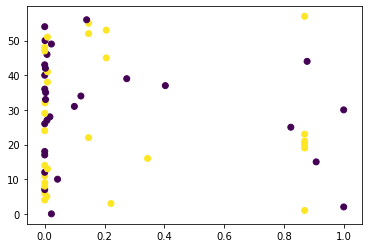

In [0]:
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
from gensim.models.keyedvectors import KeyedVectors
import gc
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from smart_open import open
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from keras.layers import Dropout
from matplotlib import pyplot as plt

dataset1 = np.array(pd.read_csv('/content/drive/My Drive/MCA Dataset/dev_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8'))[:, 0:2]
dataset2 = np.array(pd.read_csv('/content/drive/My Drive/MCA Dataset/full_test_split.csv',delimiter=',',encoding='utf-8'))[:, 0:2]
dataset3 = np.array(pd.read_csv('/content/drive/My Drive/MCA Dataset/train_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8'))[:, 0:2]

dataset = np.concatenate((dataset1, np.concatenate((dataset2, dataset3))))

countPos = 0

def checkPosNeg(dataset, index):
    for i in range(0, len(dataset)):
        if(dataset[i][0] == index):
            return dataset[i][1]
    return 0

Data = []
Y = []

countPos = 0
index = -1
Data_test = []
Y_test = []
for i in range(0, len(dataset3)):
    val = checkPosNeg(dataset, dataset3[i][0])
    # if(val == 0 and countPos>37):
    #     continue
    Y.append(val)
    # index+=1
    # if(Y[index] == 0):
    #     countPos+=1
    try:
      fileName = "/content/drive/My Drive/MCA Dataset/train_data/" + str(int(dataset3[i][0])) + "_TRANSCRIPT.csv"
      Data.append(np.array(pd.read_csv(fileName,delimiter='\t',encoding='utf-8', engine='python'))[:, 2:4])
    except Exception as e:
      print(e)


for i in range(0, len(dataset1)):
    val = checkPosNeg(dataset, dataset1[i][0])
    # if(val == 0):
    #     continue
    Y.append(val)
    try:
      fileName = "/content/drive/My Drive/MCA Dataset/dev_data/" + str(int(dataset1[i][0])) + "_TRANSCRIPT.csv"
      Data.append(np.array(pd.read_csv(fileName,delimiter='\t',encoding='utf-8', engine='python'))[:, 2:4])
    except Exception as e:
      print(e)
for i in range(0, len(dataset2)):
    Y_test.append(checkPosNeg(dataset, dataset2[i][0]))
    try:
      fileName = "/content/drive/My Drive/MCA Dataset/test_data/" + str(int(dataset2[i][0])) + "_TRANSCRIPT.csv"
      Data_test.append(np.array(pd.read_csv(fileName,delimiter='\t',encoding='utf-8', engine='python'))[:, 2:4])
    except Exception as e:
      print(e)

    
Y = np.array(Y)
Data2 = []

Data2_test = []
Y_test = np.array(Y_test)

for i in range(0, len(Data)):
    script = []
    for k in range(1, len(Data[i])):
        if(Data[i][k][0] == "Participant"):
            script.append(Data[i][k][1])
    Data2.append(script)
    
for i in range(0, len(Data_test)):
    script = []
    for k in range(1, len(Data_test[i])):
        if(Data_test[i][k][0] == "Participant"):
            script.append(Data_test[i][k][1])
    Data2_test.append(script)

Data = []
Data_test = []
gc.collect()        
Data2 = np.array(Data2)
Data2_test = np.array(Data2_test)
print("data2", Data2.shape)

model = KeyedVectors.load_word2vec_format('/content/drive/My Drive/Copy of GoogleNews-vectors-negative300.bin', binary=True)

stop_words = set(stopwords.words('english'))


def Thresholding(Y_pred, threshold):
  Y_pred2 = []
  for i in range(len(Y_pred)):
    if(Y_pred[i] < threshold):
      Y_pred2.append(0)
    else:
      Y_pred2.append(1)

  return np.array(Y_pred2)

def remove_StopWords(sentence):
    filtered_sentence = [] 
    for w in sentence: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    
    return filtered_sentence

def checkAcc(Y_pred, Y_test):
    correct = 0
    for i in range(len(Y_pred)):
        if(Y_pred[i] == Y_test[i]):
            correct+=1
    
    return float(correct)/len(Y_pred)

def upsample(X_train,Y_train):
  X_train_0 = X_train[Y_train==0]
  X_train_1 = X_train[Y_train==1]

  Y_train_1 = Y_train[Y_train==1]
  # print(Y_train_1.shape)
  # print(X_train_1.shape)
  size = X_train_0.shape[0] - X_train_1.shape[0]
  X = []
  Y = []
  X_train = list(X_train)
  Y_train = list(Y_train)
  while(size>0):
    size -= 1
    index = np.random.randint(0,X_train_1.shape[0]-1)
    leave_index = np.random.randint(0,len(X_train)-1)
    X_add = X_train_1[index]
    X_leave = X_train[leave_index]

    Y_add = Y_train_1[index]
    Y_leave = Y_train[leave_index]

    X_train[leave_index] = X_add
    X_train.append(X_leave)

    Y_train[leave_index] = Y_add
    Y_train.append(Y_leave)


  X_train = np.array(X_train)
  Y_train = np.array(Y_train)
  return X_train,Y_train


max_num_words = 20
max_num_sentence = 250
# len_sentence_arr = []
# len_word_arr = []

#train_data
finalMatrix = np.zeros((Data2.shape[0], max_num_sentence, max_num_words, 300))
print(finalMatrix.shape)
max_length_sent = 0
sent = ""
for k in range(Data2.shape[0]):
    if(max_length_sent < len(Data2[k])):
      max_length_sent = len(Data2[k])
      sent = Data2[k]
    for i in range(min(max_num_sentence, len(Data2[k]))):
    	# len_sentence_arr.append(len(Data2[k]))
    	try:
    	  sentence = Data2[k][i].split(" ")
    	except:
    	  continue
    	sentence = remove_StopWords(sentence)
    	for j in range(min(max_num_words, len(sentence))):
    		# len_word_arr.append(len(sentence))
    		try:
    		  word = sentence[j]
    		  # print("Before", word)
    		  if(word[0] == '<'):
    		    if(word.find('>')!=-1):
    		      word = word[1:-1]
    		    else:
    		      word = word[1:]
    		  else:
    		    if(word.find('>')!=-1):
    		      word = word[0:-1]
    		  # print("After", word)
    		  finalMatrix[k][i][j] = np.array(model[word])
    		except Exception as e:
    			# print(e)
    			continue
# X = np.zeros((len(Data2), max_num_sentence*max_num_words))
print("MAXI train", max_length_sent)
print(sent)
# for i in range(len(finalMatrix)):
#     X[i] = finalMatrix[i].flatten().reshape(1, -1)
 
#Test_data
max_length_sent = 0
finalMatrix_test = np.zeros((Data2_test.shape[0], max_num_sentence, max_num_words, 300))
print(finalMatrix_test.shape)
for k in range(Data2_test.shape[0]):
    if(max_length_sent < len(Data2_test[k])):
      max_length_sent = len(Data2_test[k])
      sent = Data2_test[k]
    for i in range(min(max_num_sentence, len(Data2_test[k]))):
    	try:
    	  sentence = Data2_test[k][i].split(" ")
    	except:
    	  continue
    	sentence = remove_StopWords(sentence)
    	for j in range(min(max_num_words, len(sentence))):
    		try:
    		  word = sentence[j]
    		  # print("Before", word)
    		  if(word[0] == '<'):
    		    if(word.find('>')!=-1):
    		      word = word[1:-1]
    		    else:
    		      word = word[1:]
    		  else:
    		    if(word.find('>')!=-1):
    		      word = word[0:-1]
    		  # print("After", word)
    		  finalMatrix_test[k][i][j] = np.array(model[word])
    		except Exception as e:
    			# print(e)
    			continue
# X_test = np.zeros((len(Data2_test), max_num_sentence*max_num_words))
print("MAXI test", max_length_sent)
print(sent)
# for i in range(len(finalMatrix_test)):
#     X_test[i] = finalMatrix_test[i].flatten().reshape(1, -1)

Data2 = []
Data2_test = []
model = []
stop_words = []
gc.collect()


print("shape X", finalMatrix.shape)
print("shape Y", Y.shape)
finalMatrix, Y = upsample(finalMatrix,Y)
finalMatrix_test, Y_test = upsample(finalMatrix_test,Y_test)
# print("shape X", finalMatrix.shape)
# print("shape Y", Y.shape)



# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(150, (1, 5), input_shape = (finalMatrix.shape[1], finalMatrix.shape[2], finalMatrix.shape[3]), activation = 'relu', data_format="channels_last"))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (1, 3)))

# Adding a second convolutional layer
classifier.add(Conv2D(75, (1, 3), activation = 'relu', data_format="channels_last"))
classifier.add(MaxPooling2D(pool_size = (1, 2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
# classifier.add(Dropout(0.4))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# classifier.add(Dense(units = 1, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# class_weight = {0: 0.2, 1: 0.8}
classifier.fit(finalMatrix, Y, epochs=10)
# classifier.fit(finalMatrix, Y, epochs=10, class_weight=class_weight)

score = classifier.evaluate(finalMatrix, Y)
print(classification_report(Y, Thresholding(classifier.predict(finalMatrix), 0.5)))


print("SCORE Train ", score)

# print("0.1")
# print(classification_report(Y, Thresholding(classifier.predict(finalMatrix), 0.1)))
# print("0.3")
# print(classification_report(Y, Thresholding(classifier.predict(finalMatrix), 0.3)))
# print("0.7")
# print(classification_report(Y, Thresholding(classifier.predict(finalMatrix), 0.7)))


score = classifier.evaluate(finalMatrix_test, Y_test)
print("SCORE Test", score)



Y_pred = classifier.predict(finalMatrix_test)
print("0.1")
print(classification_report(Y_test, Thresholding(Y_pred, 0.1)))
print("0.3")
print(classification_report(Y_test, Thresholding(Y_pred, 0.3)))
print("0.5")
print(classification_report(Y_test, Thresholding(Y_pred, 0.5)))
print("0.7")
print(classification_report(Y_test, Thresholding(Y_pred, 0.7)))

num_arr = []
for i in range(0, len(Y_pred)):
  num_arr.append(i)

# from matplotlib import pyplot as plt
Y_pred = classifier.predict(finalMatrix_test)
plt.scatter(Y_pred, num_arr, c=Y_test)

"""
from matplotlib import pyplot as plt
hist, bins = np.histogram(np.array(len_sentence_arr), bins=50, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)

hist, bins = np.histogram(np.array(len_word_arr), bins=500, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)
"""

In [0]:
print(Thresholding(Y_pred, 0.1))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [0]:
from sklearn.metrics import classification_report
class_weight = {0: 0.5, 1: 0.6}

classifier.fit(finalMatrix, Y, epochs=10, class_weight=class_weight)
score = classifier.evaluate(finalMatrix_test, Y_test)
print(classification_report(Y_test, Thresholding(classifier.predict(finalMatrix_test), 0.5)))


print("SCORE", score)

Epoch 1/10
137/137 [==============================] - 1s 4ms/step - loss: 0.0033 - acc: 1.0000
Epoch 2/10
137/137 [==============================] - 1s 4ms/step - loss: 0.0019 - acc: 1.0000
Epoch 3/10
137/137 [==============================] - 1s 4ms/step - loss: 0.0013 - acc: 1.0000
Epoch 4/10
137/137 [==============================] - 1s 4ms/step - loss: 9.3223e-04 - acc: 1.0000
Epoch 5/10
137/137 [==============================] - 1s 4ms/step - loss: 7.2217e-04 - acc: 1.0000
Epoch 6/10
137/137 [==============================] - 1s 4ms/step - loss: 6.0521e-04 - acc: 1.0000
Epoch 7/10
137/137 [==============================] - 1s 4ms/step - loss: 5.2117e-04 - acc: 1.0000
Epoch 8/10
137/137 [==============================] - 1s 4ms/step - loss: 4.5683e-04 - acc: 1.0000
Epoch 9/10
137/137 [==============================] - 1s 4ms/step - loss: 4.1687e-04 - acc: 1.0000
Epoch 10/10
41/41 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

 